In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
raw_csv = pd.read_csv('datasets_38367_58429_Toddler Autism dataset July 2018.csv')
raw_csv.columns.tolist()
raw_csv.drop(['Case_No'],axis=1, inplace=True)
raw_csv.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


In [3]:
sex_dum = pd.get_dummies(raw_csv.Sex, prefix='Sex')
jaundice_dum = pd.get_dummies(raw_csv.Jaundice, prefix='Jaun')
fam_with_ASD_dum = pd.get_dummies(raw_csv.Family_mem_with_ASD, prefix='Fam_ASD')
ASD_traits_dum = pd.get_dummies(raw_csv.ASD_Traits, prefix='ASD')



raw_csv.drop(['Sex','Jaundice','Family_mem_with_ASD','Ethnicity','ASD_Traits'],axis=1, inplace=True)

encoded_data = pd.concat([raw_csv, sex_dum, jaundice_dum,fam_with_ASD_dum,ASD_traits_dum], axis=1)
encoded_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex_f,Sex_m,Jaun_no,Jaun_yes,Fam_ASD_no,Fam_ASD_yes,ASD_No,ASD_Yes
0,0,0,0,0,0,0,1,1,0,1,28,1,0,0,1,1,0,1,0
1,1,1,0,0,0,1,1,0,0,0,36,0,1,0,1,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,0,1,0,1,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,0,1,1,0,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,1,0,1,0,0,1,0,1


In [4]:
encoded_data.drop(['Sex_m','Jaun_no','Fam_ASD_no','ASD_No'],axis=1, inplace=True)
encoded_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex_f,Jaun_yes,Fam_ASD_yes,ASD_Yes
0,0,0,0,0,0,0,1,1,0,1,28,1,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,0,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,0,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,1,0,1,1


In [5]:
encoded_data.describe().round(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex_f,Jaun_yes,Fam_ASD_yes,ASD_Yes
count,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00
mean,0.56,0.45,0.40,0.51,0.52,0.58,0.65,0.46,0.49,0.59,27.87,0.30,0.27,0.16,0.69
std,0.50,0.50,0.49,0.50,0.50,0.49,0.48,0.50,0.50,0.49,7.98,0.46,0.45,0.37,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,30.00,0.00,0.00,0.00,1.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,36.00,1.00,1.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,36.00,1.00,1.00,1.00,1.00


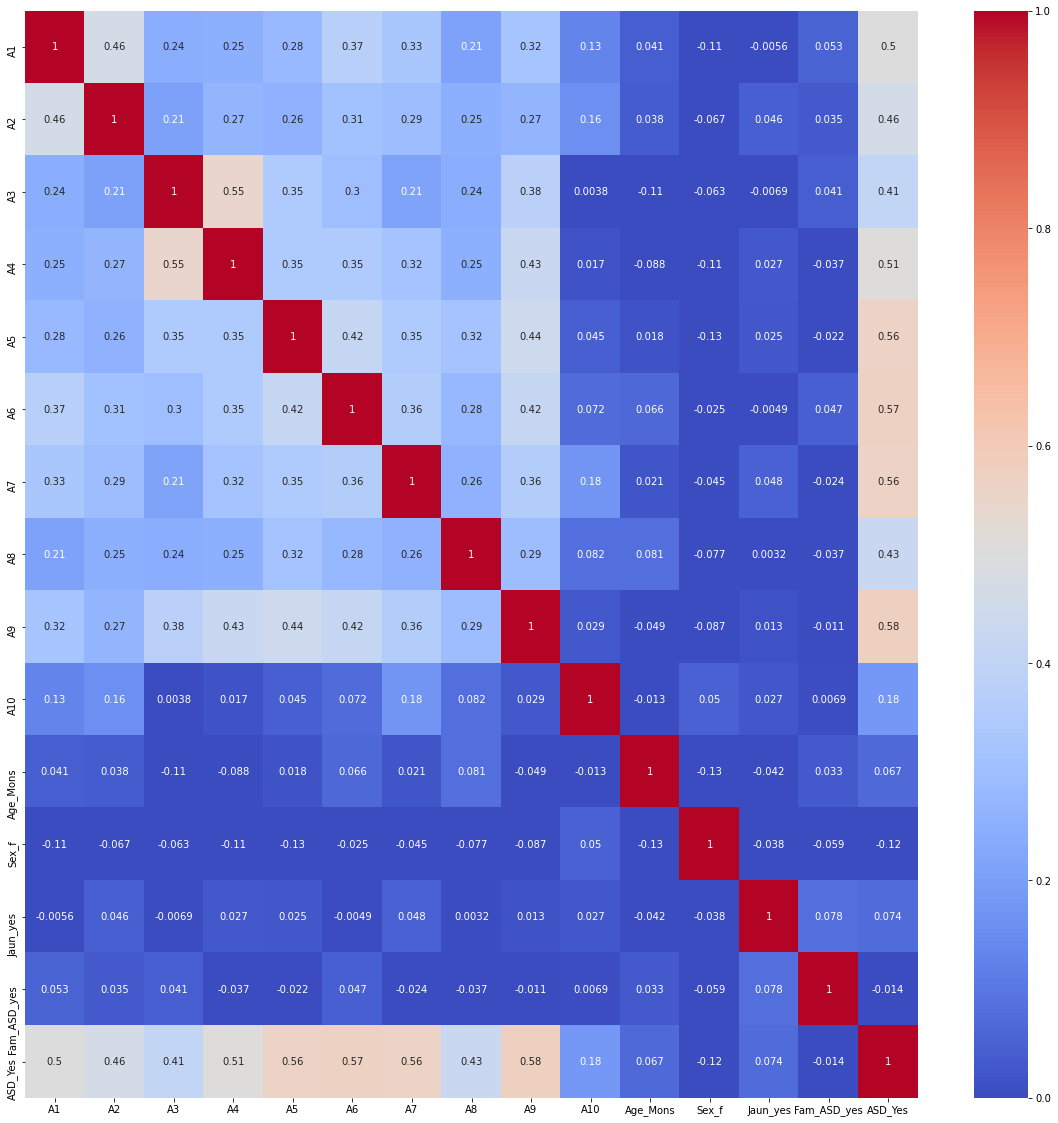

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(encoded_data.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1)

In [7]:
encoded_data.to_csv('encoded_dataset.csv',index=False,header=False)